In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [33]:
types = {'id': int, 'titulo': str, 'descripcion': str, 'tipodepropiedad': str, 'direccion': str,
        'ciudad': str, 'provincia': str, 'antiguedad': np.float32, 'habitaciones': np.float32,
        'garages':np.float32, 'idzona': np.float32, 'lat': np.float32, 'lng': np.float32,
        'gimnasio': bool, 'usosmultiples': bool, 'piscina': bool, 'escuelascercanas':bool,
        'centroscomercialescercanos':bool, 'precio':int}
data = pd.read_csv('../../data/train.csv', dtype = types)

data.head(2)

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23 00:00:00,False,False,False,False,False,2273000
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310204,-99.227654,2013-06-28 00:00:00,False,False,False,True,True,3600000


In [34]:
data.dropna(subset={'precio','ciudad','tipodepropiedad'},inplace=True)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239600 entries, 0 to 239999
Data columns (total 23 columns):
id                            239600 non-null int32
titulo                        234218 non-null object
descripcion                   238025 non-null object
tipodepropiedad               239600 non-null object
direccion                     186785 non-null object
ciudad                        239600 non-null object
provincia                     239600 non-null object
antiguedad                    196272 non-null float32
habitaciones                  217185 non-null float32
garages                       201991 non-null float32
banos                         213510 non-null float64
metroscubiertos               222259 non-null float64
metrostotales                 188239 non-null float64
idzona                        211375 non-null float32
lat                           116341 non-null float32
lng                           116341 non-null float32
fecha                         239

In [36]:
data['sum'] = 1

In [37]:
data.loc[data.precio>10000000, 'rango_precio'] = '+10000'
data.loc[((data.precio>9000000) & (data.precio<10000001)), 'rango_precio'] = '9000-10000'
data.loc[((data.precio>8000000) & (data.precio<9000001)), 'rango_precio'] = '8000-9000'
data.loc[((data.precio>7000000) & (data.precio<8000001)), 'rango_precio'] = '7000-8000'
data.loc[((data.precio>6000000) & (data.precio<7000001)), 'rango_precio'] = '6000-7000'
data.loc[((data.precio>5000000) & (data.precio<6000001)), 'rango_precio'] = '5000-6000'
data.loc[((data.precio>4000000) & (data.precio<5000001)), 'rango_precio'] = '4000-5000'
data.loc[((data.precio>3000000) & (data.precio<4000001)), 'rango_precio'] = '3000-4000'
data.loc[((data.precio>2000000) & (data.precio<3000001)), 'rango_precio'] = '2000-3000'
data.loc[((data.precio>1000000) & (data.precio<2000001)), 'rango_precio'] = '1000-2000'
data.loc[((data.precio<1000001)), 'rango_precio'] = '-1000'

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239600 entries, 0 to 239999
Data columns (total 25 columns):
id                            239600 non-null int32
titulo                        234218 non-null object
descripcion                   238025 non-null object
tipodepropiedad               239600 non-null object
direccion                     186785 non-null object
ciudad                        239600 non-null object
provincia                     239600 non-null object
antiguedad                    196272 non-null float32
habitaciones                  217185 non-null float32
garages                       201991 non-null float32
banos                         213510 non-null float64
metroscubiertos               222259 non-null float64
metrostotales                 188239 non-null float64
idzona                        211375 non-null float32
lat                           116341 non-null float32
lng                           116341 non-null float32
fecha                         239

In [39]:
tipoprop = data.tipodepropiedad.value_counts()
tipoprop = tipoprop.index

In [40]:
precio_vs_tipo = data.groupby(['rango_precio','tipodepropiedad']).agg({'sum':'sum'})
precio_vs_tipo = precio_vs_tipo.reindex(tipoprop,level=1)
precio_vs_tipo = precio_vs_tipo.unstack()
precio_vs_tipo.columns = precio_vs_tipo.columns.droplevel()

precio_vs_tipo.head()

tipodepropiedad,Casa,Apartamento,Casa en condominio,Terreno,Local Comercial,Oficina comercial,Bodega comercial,Edificio,Terreno comercial,Casa uso de suelo,...,Rancho,Local en centro comercial,Departamento Compartido,Otros,Nave industrial,Terreno industrial,Huerta,Lote,Hospedaje,Garage
rango_precio,,,,,,,,,,,,,,,,,,,,,
+10000,1120.0,980.0,290.0,101.0,25.0,26.0,13.0,102.0,35.0,13.0,...,12.0,2.0,4.0,3.0,3.0,1.0,2.0,NaN,NaN,NaN
-1000,39615.0,13809.0,3949.0,4710.0,836.0,250.0,217.0,34.0,425.0,69.0,...,27.0,45.0,38.0,33.0,4.0,7.0,7.0,4.0,NaN,1.0
1000-2000,38900.0,15396.0,4848.0,2689.0,968.0,464.0,474.0,164.0,377.0,153.0,...,33.0,56.0,39.0,37.0,23.0,5.0,4.0,NaN,NaN,NaN
2000-3000,24836.0,9252.0,3767.0,1016.0,521.0,334.0,305.0,237.0,181.0,130.0,...,33.0,33.0,23.0,18.0,11.0,3.0,2.0,1.0,1.0,NaN
3000-4000,15856.0,6244.0,2327.0,525.0,254.0,220.0,153.0,223.0,104.0,109.0,...,17.0,10.0,16.0,13.0,13.0,7.0,1.0,NaN,NaN,NaN


In [41]:
new_idx = ['-1000','1000-2000','2000-3000','3000-4000','4000-5000','5000-6000','6000-7000','7000-8000','8000-9000','9000-10000','+10000']
precio_vs_tipo = precio_vs_tipo.reindex(new_idx)

precio_vs_tipo = precio_vs_tipo.applymap(lambda x: np.log(x))

Text(114.0, 0.5, 'Rango de precio (en K$ Mexicanos)')

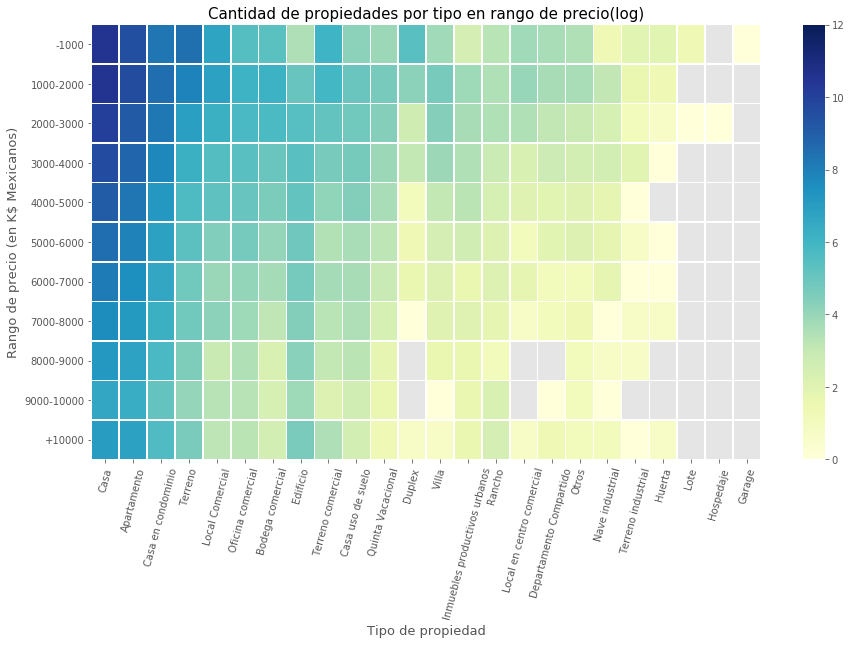

In [42]:
plt.figure(figsize=(15,8))
g = sns.heatmap(precio_vs_tipo, vmin = 0, vmax=12, cmap= "YlGnBu", linewidths=.5)
plt.xticks(rotation=75)
g.set_title("Cantidad de propiedades por tipo en rango de precio(log)", fontsize=15)
g.set_xlabel("Tipo de propiedad", fontsize=13)
g.set_ylabel("Rango de precio (en K$ Mexicanos)", fontsize=13)

In [43]:
ciudades = (data.ciudad.value_counts()>2500)
ciudades = (ciudades[ciudades==True]).index

data_ciudad = data.loc[data.ciudad.isin(ciudades)]

In [52]:
ciudad_idx = data_ciudad.ciudad.value_counts().index

In [56]:
precio_vs_ciudad = data_ciudad.groupby(['rango_precio','ciudad']).agg({'sum':'sum'})
precio_vs_ciudad = precio_vs_ciudad.reindex(ciudad_idx,level=1)
precio_vs_ciudad = precio_vs_ciudad.unstack()
precio_vs_ciudad.head()

sum                                                \
ciudad       Querétaro Benito Juárez Zapopan San Luis Potosí  Mérida   
rango_precio                                                           
+10000            11.0         143.0   121.0             8.0     6.0   
-1000           2397.0         540.0  2146.0          2063.0  1362.0   
1000-2000       4024.0        2715.0  2777.0          2925.0  2971.0   
2000-3000       3231.0        2714.0  1874.0          1522.0  1635.0   
3000-4000       1750.0        1962.0  1483.0           682.0   747.0   

                                                                      \
ciudad       Monterrey Alvaro Obregón Cuauhtémoc Naucalpan de Juárez   
rango_precio                                                           
+10000            15.0          333.0      171.0                99.0   
-1000            759.0          468.0     1224.0               160.0   
1000-2000       1636.0         1121.0     1440.0               822.0   
2000-3000       1536.0          943.0     1020.0              1354.0   
3000-4000       1280.0          937.0      776.0              1497.0   

                             ...                                           \
ciudad       Miguel Hidalgo  ... Cuernavaca Chihuahua Tlalnepantla de Baz   
rango_precio                 ...                                            
+10000                414.0  ...        5.0       4.0                 7.0   
-1000                 643.0  ...      431.0    1223.0               535.0   
1000-2000             983.0  ...     1120.0    1138.0              1100.0   
2000-3000             787.0  ...     1012.0     682.0              1048.0   
3000-4000             694.0  ...      622.0     462.0               553.0   

                                                                        \
ciudad       Cuautitlán Izcalli Tlajomulco de Zúñiga Gustavo A. Madero   
rango_precio                                                             
+10000                      NaN                  1.0              29.0   
-1000                    1555.0               1121.0             738.0   
1000-2000                1215.0                916.0             866.0   
2000-3000                 402.0                699.0             566.0   
3000-4000                 140.0                284.0             413.0   

                                                                  
ciudad       Iztapalapa Cuajimalpa de Morelos Tijuana Hermosillo  
rango_precio                                                      
+10000              7.0                 180.0     NaN        4.0  
-1000            1409.0                  88.0  2445.0     1262.0  
1000-2000         800.0                 421.0   312.0      704.0  
2000-3000         441.0                 566.0    76.0      319.0  
3000-4000         236.0                 445.0    19.0      144.0  

[5 rows x 28 columns]

In [57]:
new_idx = ['-1000','1000-2000','2000-3000','3000-4000','4000-5000','5000-6000','6000-7000','7000-8000','8000-9000','9000-10000','+10000']
precio_vs_ciudad = precio_vs_ciudad.reindex(new_idx)
precio_vs_ciudad = precio_vs_ciudad.applymap(lambda x: np.log(x))
precio_vs_ciudad.columns = precio_vs_ciudad.columns.droplevel()

Text(114.0, 0.5, 'Rango de precio')

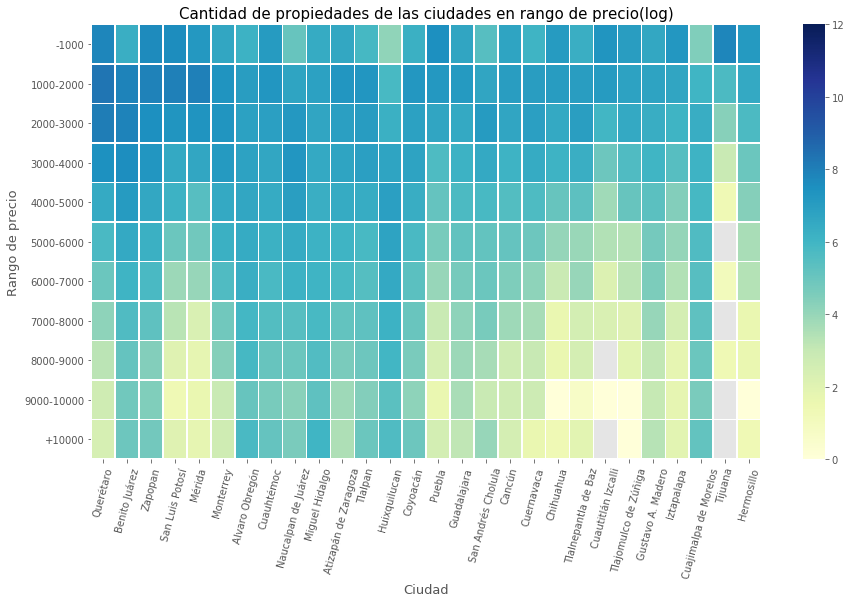

In [58]:
plt.figure(figsize=(15,8))
g = sns.heatmap(precio_vs_ciudad, vmin = 0, vmax=12, cmap= "YlGnBu", linewidths=.5)
plt.xticks(rotation=75)
g.set_title("Cantidad de propiedades de las ciudades en rango de precio(log)", fontsize=15)
g.set_xlabel("Ciudad", fontsize=13)
g.set_ylabel("Rango de precio", fontsize=13)

In [109]:
data_amen = data[['rango_precio','gimnasio','usosmultiples','piscina','escuelascercanas','centroscomercialescercanos']]
precio_amen = data_amen.groupby('rango_precio').agg({'gimnasio':'sum','usosmultiples':'sum','piscina':'sum'})
precio_amen = precio_amen.reindex(new_idx)
precio_amen = precio_amen

Text(69.0, 0.5, 'Utilidad')

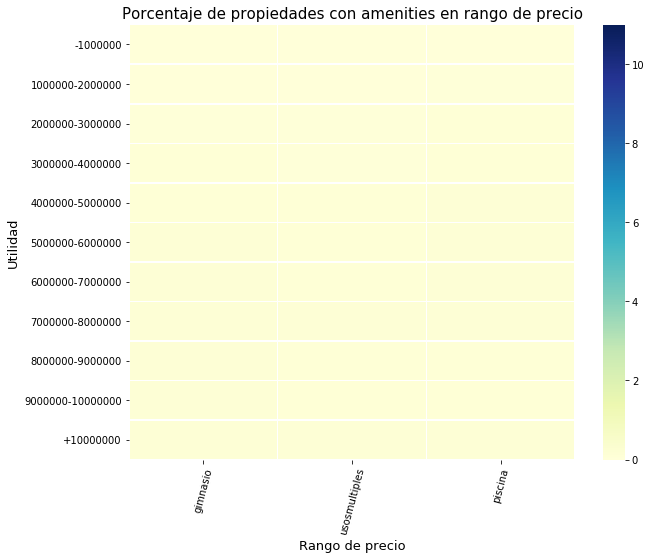

In [110]:
plt.figure(figsize=(10,8))
g = sns.heatmap(precio_amen, vmin = 0, vmax=3, cmap= "YlGnBu", linewidths=.5)
plt.xticks(rotation=75)
g.set_title("Porcentaje de propiedades con amenities en rango de precio", fontsize=15)
g.set_xlabel("Rango de precio", fontsize=13)
g.set_ylabel("Utilidad", fontsize=13)